In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr


In [11]:
file_path_b1 = "D:\BaiduNetdiskDownload\data\\bohai\\2011-2014.nc"
file_path_b2 = "D:\BaiduNetdiskDownload\data\\bohai\\2015-2018.nc"
file_path_b3 = "D:\BaiduNetdiskDownload\data\\bohai\\2019-2020.nc"
file_path_d1 = "D:\BaiduNetdiskDownload\data\donghai\\2011-2014.nc"
file_path_d2 = "D:\BaiduNetdiskDownload\data\donghai\\2015-2018.nc"
file_path_d3 = "D:\BaiduNetdiskDownload\data\donghai\\2019-2020.nc"
file_path_n1 = "D:\BaiduNetdiskDownload\data\\nanhai\\2011-2014.nc"
file_path_n2 = "D:\BaiduNetdiskDownload\data\\nanhai\\2015-2018.nc"
file_path_n3 = "D:\BaiduNetdiskDownload\data\\nanhai\\2019-2020.nc"

file_obj_b1 = xr.open_dataset(file_path_b1)
file_obj_b2 = xr.open_dataset(file_path_b2)
file_obj_b3 = xr.open_dataset(file_path_b3)
file_obj_d1 = xr.open_dataset(file_path_d1)
file_obj_d2 = xr.open_dataset(file_path_d2)
file_obj_d3 = xr.open_dataset(file_path_d3)
file_obj_n1 = xr.open_dataset(file_path_n1)
file_obj_n2 = xr.open_dataset(file_path_n2)
file_obj_n3 = xr.open_dataset(file_path_n3)
file_obj_b = xr.concat([file_obj_d1, file_obj_d2, file_obj_d3], dim='time')
file_obj_d = xr.concat([file_obj_d1, file_obj_d2, file_obj_d3], dim='time')
file_obj_n = xr.concat([file_obj_d1, file_obj_d2, file_obj_d3], dim='time')

In [24]:
# 目标B经纬度坐标
target_longitude_b = 120.00
target_latitude_b = 39.00
# 目标D经纬度坐标
target_longitude_d = 124.00
target_latitude_d = 31.00
# 目标N经纬度坐标
target_longitude_n = 116.00
target_latitude_n = 18.00

In [25]:
# 固定经度和纬度并获取其余信息
subset_data_b = file_obj_b.sel(longitude=target_longitude_b, latitude=target_latitude_b, method='nearest')
subset_data_d = file_obj_d.sel(longitude=target_longitude_d, latitude=target_latitude_d, method='nearest')
subset_data_n = file_obj_n.sel(longitude=target_longitude_n, latitude=target_latitude_n,method='nearest')

c:\Users\HAN\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\HAN\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\HAN\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\HAN\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexe

In [26]:
# 使用 .shape 获取维度的大小
shape_b = subset_data_b.variables
print("B数据的形状（维度大小）:", shape_b)
shape_d = subset_data_b.variables
print("D数据的形状（维度大小）:", shape_d)
shape_n = subset_data_n.variables
print("N数据的形状（维度大小）:", shape_n)

B数据的形状（维度大小）: Frozen({'longitude': <xarray.Variable ()>
array(120., dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude, 'latitude': <xarray.Variable ()>
array(33., dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude, 'time': <xarray.IndexVariable 'time' (time: 87672)>
array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ..., '2020-12-31T21:00:00.000000000',
       '2020-12-31T22:00:00.000000000', '2020-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:  time, 'u10': <xarray.Variable (time: 87672)>
array([3.0344195, 3.018694 , 2.7303877, ..., 1.8572996, 1.2956702,
       0.965018 ], dtype=float32)
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component, 'v10': <xarray.Variable (time: 87672)>
array([-2.4776154, -3.0755155, -3.415257 , ...,  0.9743292,  1.0218022,
        1.6277802], dtype=float32)
Attributes:
    

In [28]:
# 获取 subset_data 的维度信息
dimensions_b = subset_data_b.dims
print("维度信息:", dimensions_b)
# 获取 subset_data 的维度信息
dimensions_d = subset_data_d.dims
print("维度信息:", dimensions_d)
# 获取 subset_data 的维度信息
dimensions_n = subset_data_n.dims
print("维度信息:", dimensions_n)

维度信息: Frozen({'time': 87672})
维度信息: Frozen({'time': 87672})
维度信息: Frozen({'time': 87672})


In [ ]:
print(subset_data_b[0])

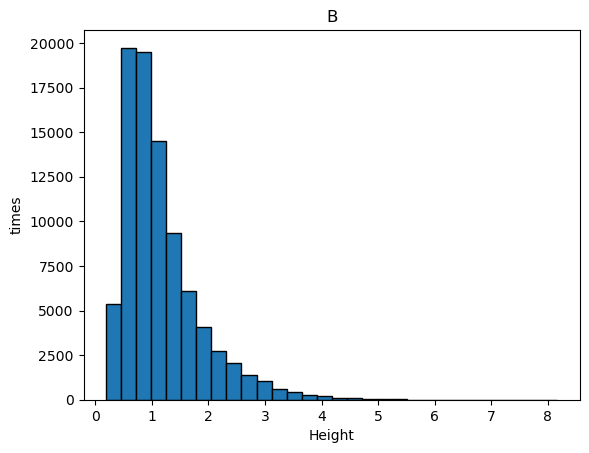

In [29]:
plt.hist(subset_data_b['swh'], bins=30, edgecolor='black', label='波高')
plt.xlabel('Height')
plt.ylabel('times')
plt.title('B')
plt.savefig('B.png')
plt.show()

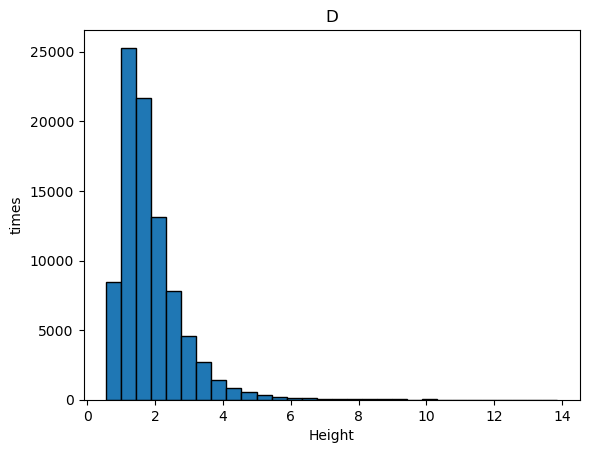

In [33]:
plt.hist(subset_data_d['swh'], bins=30, edgecolor='black', label='波高')
plt.xlabel('Height')
plt.ylabel('times')
plt.title('D')
plt.savefig('D.png')
plt.show()

c:\Users\HAN\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\HAN\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

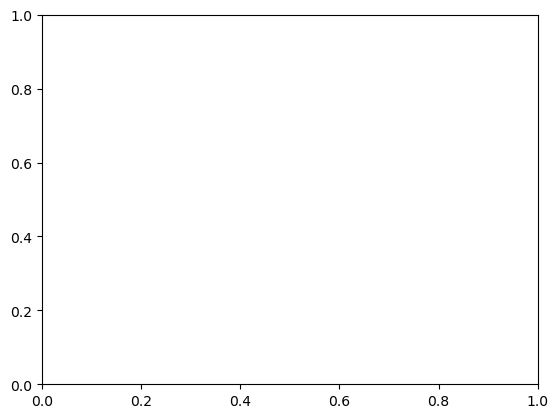

In [31]:
plt.hist(subset_data_n['swh'], bins=30, edgecolor='black', label='波高')
plt.xlabel('Height')
plt.ylabel('times')
plt.title('N')
plt.savefig('N.png')
plt.show()